In [0]:
## Import Necessary packages
#https://drive.google.com/open?id=1gemHaPfX3oPXyY0O14sjZXc0nKnQ7RWo
#!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
from astropy.utils.data import get_pkg_data_filename
import io
from astropy.io import fits
#import zipfile
#efigi_ima_g-1.6
import tarfile
file_id="1gemHaPfX3oPXyY0O14sjZXc0nKnQ7RWo"
downloaded=drive.CreateFile({'id':file_id})
downloaded.GetContentFile('efigi_ima_g-1.6.tgz')
tf = tarfile.open("efigi_ima_g-1.6.tgz")
tf.extractall()
#!unzip efigi_ima_g-1.6.zip

In [0]:
hdulist = fits.open('efigi-1.6/ima_g/PGC0000212_g.fits')

In [0]:
hdulist.info()

Filename: efigi-1.6/ima_g/PGC0000212_g.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   (255, 255)   float32   


In [0]:
hdu=hdulist[0]
hdu

In [0]:
hdu.data.shape

(255, 255)

In [0]:
hdu.header

SIMPLE  =                    T / This is a FITS file                            
BITPIX  =                  -32 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                  255 / NUMBER OF ELEMENTS ALONG THIS AXIS             
NAXIS2  =                  255 / NUMBER OF ELEMENTS ALONG THIS AXIS             
EXTEND  =                    T / This file may contain FITS extensions          
EQUINOX =            2000.0000 / Mean equinox                                   
RADECSYS= 'ICRS    '           / Astrometric system                             
CTYPE1  = 'RA---TAN'           / WCS projection type for this axis              
CUNIT1  = 'deg     '           / Axis unit                                      
CRVAL1  =      7.970833333E-01 / World coordinate on this axis                  
CRPIX1  =      1.280000000E+02 / Reference pixel on this axis                   
CD1_1   =     -1.882083383E-

In [0]:
hdu.header['OBJECT']

'76 N'

In [0]:
image_file = get_pkg_data_filename('efigi-1.6/ima_g/PGC0022205_g.fits')

In [0]:
fits.info(image_file)

Filename: efigi-1.6/ima_g/PGC0022205_g.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   (255, 255)   float32   


In [0]:
image_data = fits.getdata(image_file, ext=0)

In [0]:
print(image_data.shape)

(255, 255)


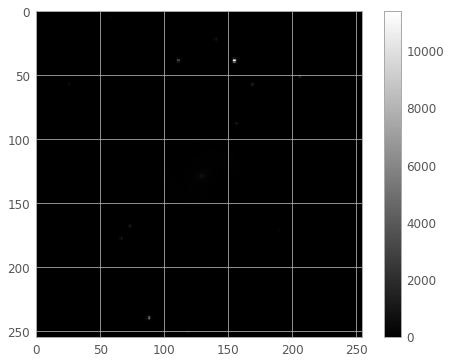

In [0]:
plt.figure()
plt.imshow(image_data, cmap='gray')
plt.colorbar()